## Dados

In [1]:
# conjunto de dados de treinamento linear com pequeno ruido gaussiano

import numpy as np
import matplotlib.pyplot as plt

# numero de amostras
N = 50

# parametros da reta
a = 2
b = 3

# ruido gaussiano
mu = 0
sigma = 0.5

# gerando os dados
x = np.random.rand(N) * 10
y = a*x + b + np.random.normal(mu, sigma, N)

# Adicionando 10 outliers
x_out = np.random.rand(10) * 10 + 5
y_out = 10 + np.random.normal(mu, sigma, 10)

x_with_outlier = np.concatenate((x, x_out))
y_with_outlier = np.concatenate((y, y_out))

Text(0, 0.5, 'y')

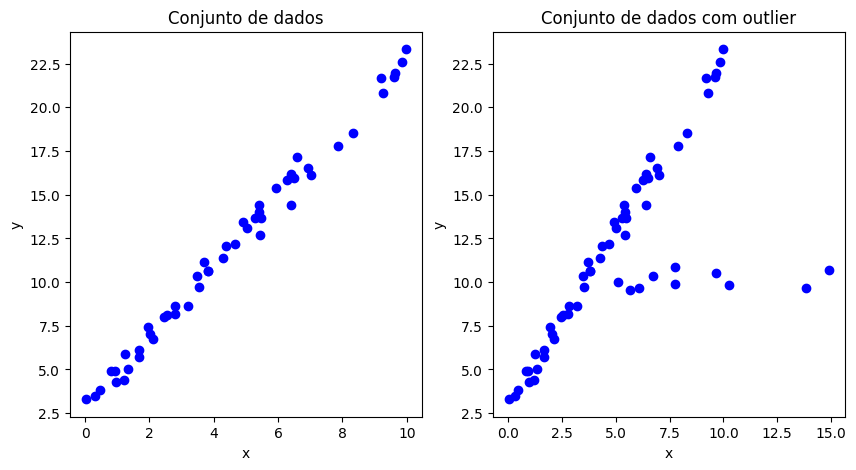

In [2]:
# plotando os dados
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

## Treinando os modelos

In [3]:
def linear_model(x, y):
    x = np.array(x)
    y = np.array(y)
    x = np.c_[np.ones(x.shape[0]), x]
    beta = np.linalg.inv(x.T @ x) @ x.T @ y
    return beta

In [4]:
# Modelo linear sem outlier
beta = linear_model(x, y)

# Modelo linear com outlier
beta_with_outlier = linear_model(x_with_outlier, y_with_outlier)

print ('Coeficientes do modelo sem outlier:', beta)
print ('Coeficientes do modelo com outlier:', beta_with_outlier)

Coeficientes do modelo sem outlier: [2.95286469 1.98426123]
Coeficientes do modelo com outlier: [5.76016066 1.11753473]


Text(0, 0.5, 'y')

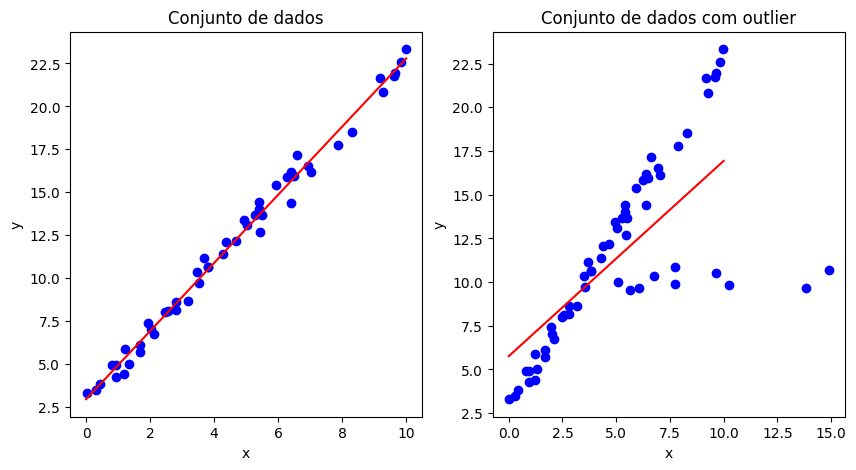

In [5]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


### Removendo os outliers

### Primeira forma: Batch

In [6]:
x_without_outlier = x_with_outlier[:-10]
y_without_outlier = y_with_outlier[:-10]

In [7]:
def gradient_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    Y = Y[:, np.newaxis]
    
    # Calcula o gradiente da perda com base nos coeficientes beta e no conjunto de dados X e Y
    gradient = 2 * X.T @ (X @ beta.T - Y)
    return gradient.T

def Hessian_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    
    # Calcula a Hessiana da perda com base nos coeficientes beta e no conjunto de dados X e Y
    Hessian = 2 * X.T @ X
    return Hessian

In [8]:
w_star = np.array(beta_with_outlier)

# Coloca mais uma dimensão no vetor w_star
w_star = w_star[:, np.newaxis].T
lambda_val = 0.1
Delta = lambda_val * w_star * (len(x_with_outlier) - len(x_without_outlier)) + gradient_loss(w_star, x_with_outlier[-10:], y_with_outlier[-10:])

H_w_star_inv = np.linalg.inv(Hessian_loss(beta_with_outlier, x_with_outlier[:-10], y_with_outlier[:-10]))

w_minus = w_star + (H_w_star_inv @ Delta.T).T

In [9]:
print ('Coeficientes do modelo treinando sem o outlier:', beta)
print ('Coeficientes do modelo treinando com o outlier:', beta_with_outlier)
print ('Coeficientes do modelo treinando com o outlier e depois removendo:', w_minus)

Coeficientes do modelo treinando sem o outlier: [2.95286469 1.98426123]
Coeficientes do modelo treinando com o outlier: [5.76016066 1.11753473]
Coeficientes do modelo treinando com o outlier e depois removendo: [[3.15080335 1.95306234]]


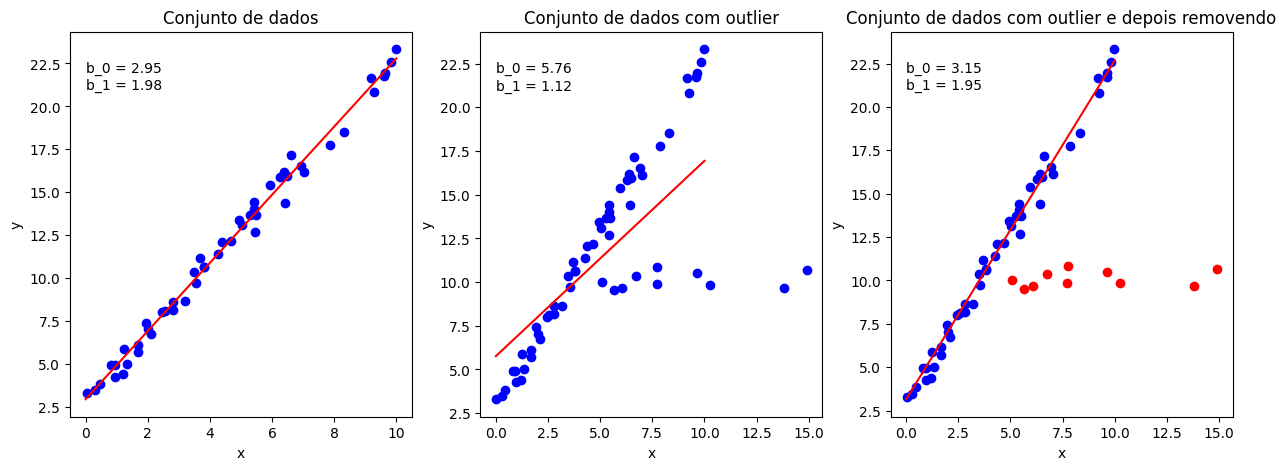

In [10]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot
y_plot_minus = w_minus[0, 0] + w_minus[0, 1]*x_plot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
# Adiciona o valor dos parâmetros no gráfico
ax[0].text(0, 22, 'b_0 = {:.2f}'.format(beta[0]))
ax[0].text(0, 21, 'b_1 = {:.2f}'.format(beta[1]))
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
# Adiciona o valor dos parâmetros no gráfico
ax[1].text(0, 22, 'b_0 = {:.2f}'.format(beta_with_outlier[0]))
ax[1].text(0, 21, 'b_1 = {:.2f}'.format(beta_with_outlier[1]))
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


ax[2].scatter(x_with_outlier[-10:], y_with_outlier[-10:], color='red')
ax[2].scatter(x_without_outlier, y_without_outlier, color='blue')
ax[2].plot(x_plot, y_plot_minus, color='red')
ax[2].set_title('Conjunto de dados com outlier e depois removendo')
# Adiciona o valor dos parâmetros no gráfico
ax[2].text(0, 22, 'b_0 = {:.2f}'.format(w_minus[0, 0]))
ax[2].text(0, 21, 'b_1 = {:.2f}'.format(w_minus[0, 1]))
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

# salva a figura em um arquivo
plt.savefig('linear_regression_outlier.png')

### Segunda forma: Ponto a Ponto

In [11]:
def gradient_loss(beta, x_i, y_i):
    x_i = np.append(1, x_i)

    # Calcula o gradiente da perda para a amostra (x_i, y_i) com base nos coeficientes beta
    grad_loss = - 2 * (y_i - beta @ x_i) * x_i
    return grad_loss

def Hessian_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    
    # Calcula a Hessiana da perda com base nos coeficientes beta e no conjunto de dados X e Y
    Hessian = 2 * X.T @ X
    return Hessian

In [12]:
beta_with_outlier

array([5.76016066, 1.11753473])

In [13]:
x_with_outlier

array([ 9.26375793,  0.93207064,  2.11000695,  1.94559944,  9.98423526,
        9.84230382,  1.23148515,  2.56206417,  6.39618809,  4.27339187,
        0.03038575,  3.19160555,  5.40541786,  7.87647589,  0.45025284,
        6.26520566,  5.01853302,  2.80224403,  5.4430784 ,  2.45752742,
        1.33507716,  6.4087878 ,  2.80540883,  3.81144969,  3.5427079 ,
        3.81633645,  6.60265101,  9.18646008,  1.68040077,  0.81977886,
        0.29834699,  2.01837554,  5.41192646,  5.27879557,  4.37889852,
        9.63799264,  0.94732512,  9.61312224,  5.48383373,  4.66977809,
        6.49126956,  7.03027002,  1.19827666,  3.47845795,  8.31510759,
        4.92419837,  1.67756815,  5.94167292,  3.69370021,  6.92724188,
        6.07186717, 14.90431547,  6.74022936, 13.82051361,  5.64948649,
        7.73355554, 10.25376029,  9.64908072,  7.74076844,  5.09314715])

In [14]:
w_star = np.array(beta_with_outlier)
w_minus_batch = w_star
n_remove = 10

for i in range(1, n_remove + 1): 
    lambda_val = 0.1
    Delta = lambda_val * w_minus_batch + np.array([gradient_loss(w_minus_batch, x_with_outlier[-i], y_with_outlier[-i])])

    H_w_star_inv = np.linalg.inv(Hessian_loss(w_minus_batch, x_with_outlier[:-i], y_with_outlier[:-i]))

    w_minus_batch = w_minus_batch + (H_w_star_inv @ Delta.T).T

In [15]:
print ('Coeficientes do modelo treinando sem o outlier:', beta)
print ('Coeficientes do modelo treinando com o outlier:', beta_with_outlier)
print ('Coeficientes do modelo treinando com o outlier e depois removendo:', w_minus_batch)

Coeficientes do modelo treinando sem o outlier: [2.95286469 1.98426123]
Coeficientes do modelo treinando com o outlier: [5.76016066 1.11753473]
Coeficientes do modelo treinando com o outlier e depois removendo: [[3.13036582 1.9563975 ]]


Text(0, 0.5, 'y')

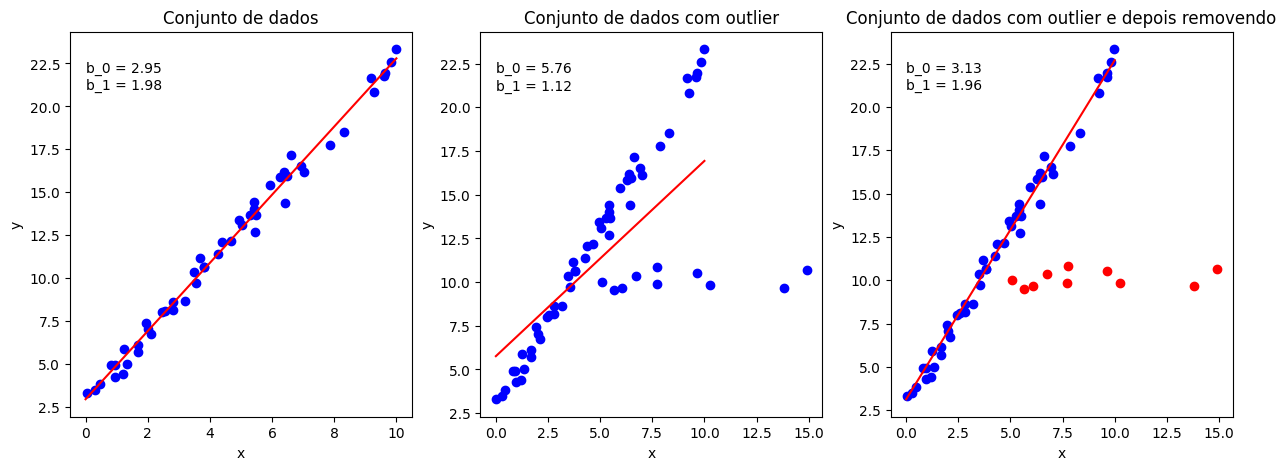

In [16]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot
y_plot_minus_batch = w_minus_batch[0, 0] + w_minus_batch[0, 1]*x_plot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
# Adiciona o valor dos parâmetros no gráfico
ax[0].text(0, 22, 'b_0 = {:.2f}'.format(beta[0]))
ax[0].text(0, 21, 'b_1 = {:.2f}'.format(beta[1]))

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
# Adiciona o valor dos parâmetros no gráfico
ax[1].text(0, 22, 'b_0 = {:.2f}'.format(beta_with_outlier[0]))
ax[1].text(0, 21, 'b_1 = {:.2f}'.format(beta_with_outlier[1]))

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


ax[2].scatter(x_with_outlier[-10:], y_with_outlier[-10:], color='red')
ax[2].scatter(x_without_outlier, y_without_outlier, color='blue')
ax[2].plot(x_plot, y_plot_minus_batch, color='red')
ax[2].set_title('Conjunto de dados com outlier e depois removendo')
# Adiciona o valor dos parâmetros no gráfico
ax[2].text(0, 22, 'b_0 = {:.2f}'.format(w_minus_batch[0, 0]))
ax[2].text(0, 21, 'b_1 = {:.2f}'.format(w_minus_batch[0, 1]))
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')



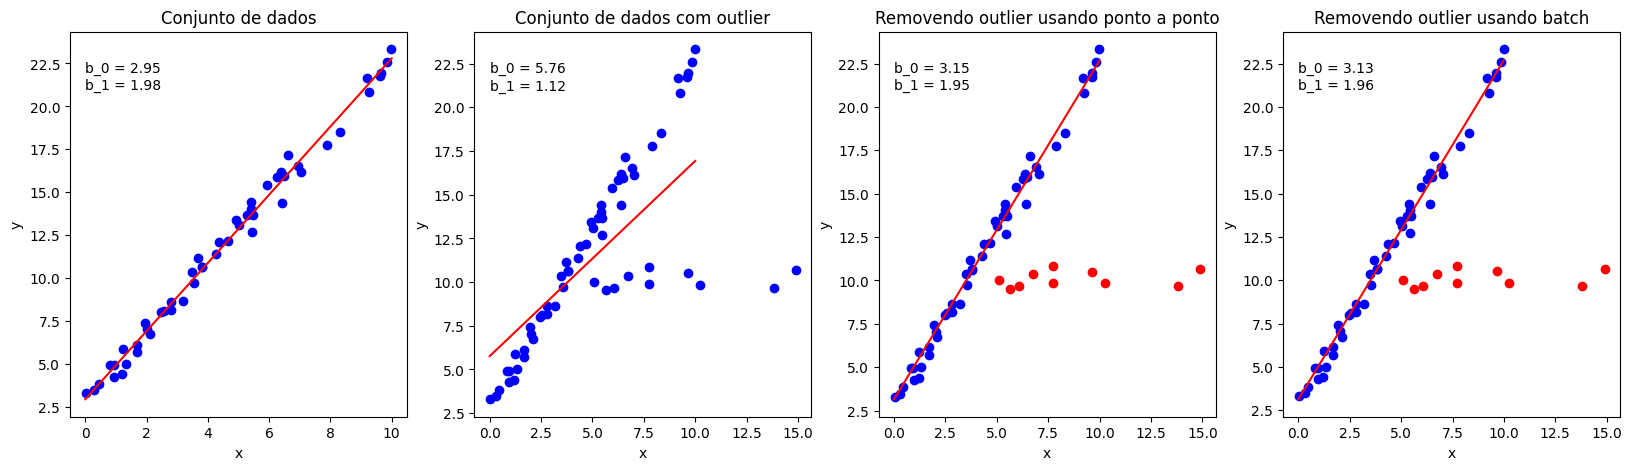

In [17]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot
y_plot_minus = w_minus[0, 0] + w_minus[0, 1]*x_plot

y_plot_minus_batch = w_minus_batch[0, 0] + w_minus_batch[0, 1]*x_plot

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
# Adiciona o valor dos parâmetros no gráfico
ax[0].text(0, 22, 'b_0 = {:.2f}'.format(beta[0]))
ax[0].text(0, 21, 'b_1 = {:.2f}'.format(beta[1]))

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
# Adiciona o valor dos parâmetros no gráfico
ax[1].text(0, 22, 'b_0 = {:.2f}'.format(beta_with_outlier[0]))
ax[1].text(0, 21, 'b_1 = {:.2f}'.format(beta_with_outlier[1]))

ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

ax[2].scatter(x_with_outlier[-10:], y_with_outlier[-10:], color='red')
ax[2].scatter(x_without_outlier, y_without_outlier, color='blue')
ax[2].plot(x_plot, y_plot_minus, color='red')
ax[2].set_title('Removendo outlier usando ponto a ponto')
# Adiciona o valor dos parâmetros no gráfico
ax[2].text(0, 22, 'b_0 = {:.2f}'.format(w_minus[0, 0]))
ax[2].text(0, 21, 'b_1 = {:.2f}'.format(w_minus[0, 1]))
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')


ax[3].scatter(x_with_outlier[-10:], y_with_outlier[-10:], color='red')
ax[3].scatter(x_without_outlier, y_without_outlier, color='blue')
ax[3].plot(x_plot, y_plot_minus_batch, color='red')
ax[3].set_title('Removendo outlier usando batch')
# Adiciona o valor dos parâmetros no gráfico
ax[3].text(0, 22, 'b_0 = {:.2f}'.format(w_minus_batch[0, 0]))
ax[3].text(0, 21, 'b_1 = {:.2f}'.format(w_minus_batch[0, 1]))
ax[3].set_xlabel('x')
ax[3].set_ylabel('y')

# salva a figura em um arquivo
plt.savefig('linear_regression_outlier.png')

## Calculando o tempo

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import time

# Configuração inicial dos dados
N = 50
a = 2
b = 3
mu = 0
sigma = 0.5

np.random.seed(42)  # Para reproducibilidade
x = np.random.rand(N) * 10
y = a * x + b + np.random.normal(mu, sigma, N)

# Adicionando outliers
x_out = np.random.rand(10) * 10 + 5
y_out = 10 + np.random.normal(mu, sigma, 10)

x_with_outlier = np.concatenate((x, x_out))
y_with_outlier = np.concatenate((y, y_out))

# Funções de perda e gradientes
def gradient_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    Y = Y[:, np.newaxis]
    return 2 * X.T @ (X @ beta - Y)

def Hessian_loss(X):
    X = np.column_stack([np.ones(len(X)), X])
    return 2 * X.T @ X

# Treinamento do modelo usando SGD
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)

start_time = time.time()
sgd_regressor.fit(x_with_outlier.reshape(-1, 1), y_with_outlier)
train_time = time.time() - start_time

# treinando o modelo sem outlier
sgd_regressor_without_outlier = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)

start_time = time.time()
sgd_regressor_without_outlier.fit(x.reshape(-1, 1), y)
train_time_without_outlier = time.time() - start_time


w_star = np.array([[sgd_regressor.intercept_[0]], [sgd_regressor.coef_[0]]])

# Primeira forma: remoção em lote
start_time = time.time()
H_w_star_inv = np.linalg.inv(Hessian_loss(x_with_outlier[:-10]))
Delta = gradient_loss(w_star, x_with_outlier[-10:], y_with_outlier[-10:])
w_minus = w_star - H_w_star_inv @ Delta
batch_time = time.time() - start_time

# Segunda forma: ponto a ponto
w_minus_batch = w_star
start_time = time.time()
for i in range(1, 11):
    grad_point = gradient_loss(w_minus_batch, np.array([x_with_outlier[-i]]), np.array([y_with_outlier[-i]]))
    H_w_star_inv = np.linalg.inv(Hessian_loss(x_with_outlier[:-i]))
    w_minus_batch -= H_w_star_inv @ grad_point
point_time = time.time() - start_time

print(f"Tempo de treinamento: {train_time} segundos")
print(f"Tempo de treinamento sem outlier: {train_time_without_outlier} segundos")
print(f"Tempo de remoção em lote: {batch_time} segundos")
print(f"Tempo de remoção ponto a ponto: {point_time} segundos")


Tempo de treinamento: 0.006037712097167969 segundos
Tempo de treinamento sem outlier: 0.005341529846191406 segundos
Tempo de remoção em lote: 0.0012867450714111328 segundos
Tempo de remoção ponto a ponto: 0.0042111873626708984 segundos


Conjunto de dados com 50000 pontos e 1000 outliers processado
Conjunto de dados com 50000 pontos e 5000 outliers processado
Conjunto de dados com 50000 pontos e 10000 outliers processado
Conjunto de dados com 100000 pontos e 1000 outliers processado
Conjunto de dados com 100000 pontos e 5000 outliers processado
Conjunto de dados com 100000 pontos e 10000 outliers processado
Conjunto de dados com 200000 pontos e 1000 outliers processado
Conjunto de dados com 200000 pontos e 5000 outliers processado
Conjunto de dados com 200000 pontos e 10000 outliers processado
Conjunto de dados com 300000 pontos e 1000 outliers processado
Conjunto de dados com 300000 pontos e 5000 outliers processado
Conjunto de dados com 300000 pontos e 10000 outliers processado


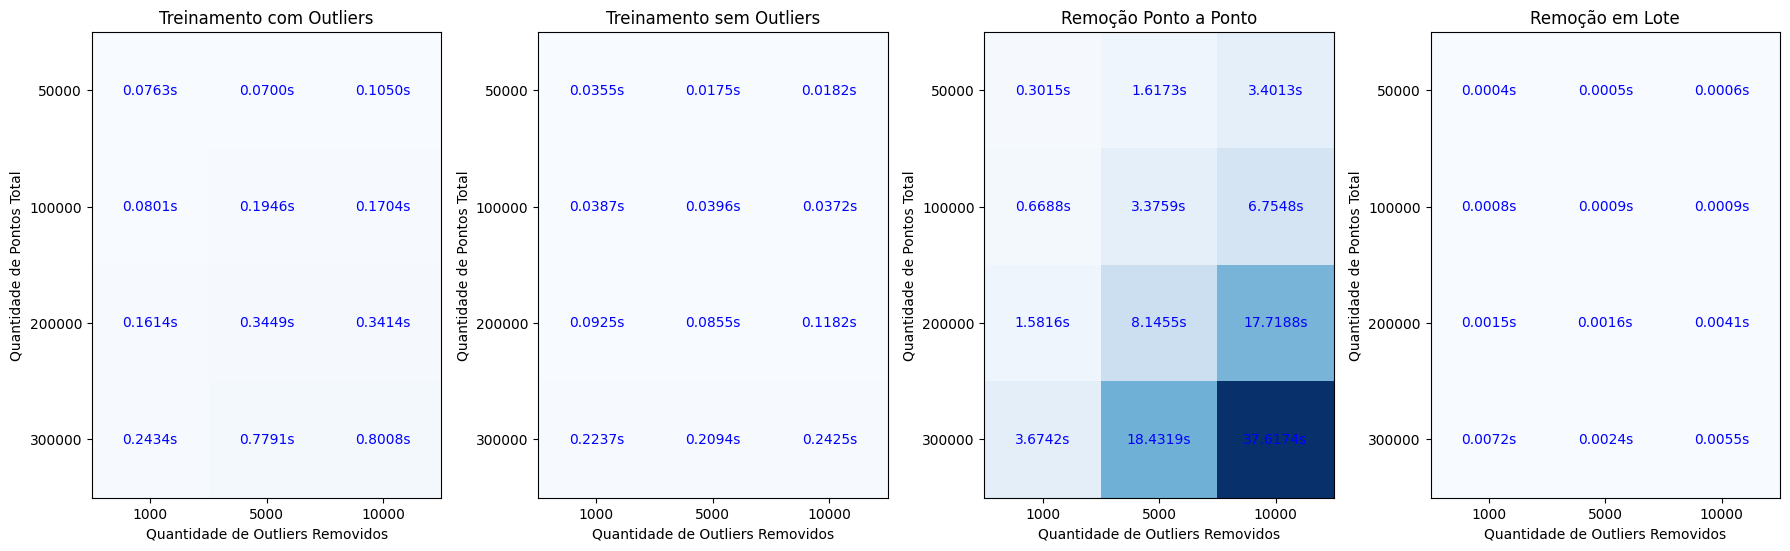

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import time

# Configuração dos parâmetros iniciais
a = 2
b = 3
mu = 0
sigma = 0.5

# Números de pontos e de outliers para teste
point_sizes = [50000, 100000, 200000, 300000]  # diferentes tamanhos de dataset
outlier_counts = [1000, 5000, 10000]   # diferentes quantidades de outliers

# Matrizes para armazenar os tempos para cada método
times_train_with_outliers = np.zeros((len(point_sizes), len(outlier_counts)))
times_train_without_outliers = np.zeros((len(point_sizes), len(outlier_counts)))
times_batch_removal = np.zeros((len(point_sizes), len(outlier_counts)))
times_point_removal = np.zeros((len(point_sizes), len(outlier_counts)))

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)

# Funções de perda e gradientes
def gradient_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    Y = Y[:, np.newaxis]
    return 2 * X.T @ (X @ beta - Y)

def Hessian_loss(X):
    X = np.column_stack([np.ones(len(X)), X])
    return 2 * X.T @ X

# Loop sobre os tamanhos de pontos e outliers
for i, N in enumerate(point_sizes):
    x = np.random.rand(N) * 10
    y = a * x + b + np.random.normal(mu, sigma, N)
    
    for j, num_outliers in enumerate(outlier_counts):
        x_out = np.random.rand(num_outliers) * 10 + 5
        y_out = 10 + np.random.normal(mu, sigma, num_outliers)
        
        x_with_outlier = np.concatenate((x, x_out))
        y_with_outlier = np.concatenate((y, y_out))
        
        # Treinamento com outliers
        start_time = time.time()
        sgd_regressor.fit(x_with_outlier.reshape(-1, 1), y_with_outlier)
        times_train_with_outliers[i, j] = time.time() - start_time
        
        # Treinamento sem outliers
        start_time = time.time()
        sgd_regressor.fit(x.reshape(-1, 1), y)
        times_train_without_outliers[i, j] = time.time() - start_time
        
        w_star = np.array([[sgd_regressor.intercept_[0]], [sgd_regressor.coef_[0]]])
        
        # Remoção em lote
        start_time = time.time()
        H_w_star_inv = np.linalg.inv(Hessian_loss(x_with_outlier[:-num_outliers]))
        Delta = gradient_loss(w_star, x_with_outlier[-num_outliers:], y_with_outlier[-num_outliers:])
        w_minus = w_star - H_w_star_inv @ Delta
        times_batch_removal[i, j] = time.time() - start_time
        
        # Remoção ponto a ponto
        w_minus_batch = w_star
        start_time = time.time()
        for k in range(1, num_outliers + 1):
            grad_point = gradient_loss(w_minus_batch, np.array([x_with_outlier[-k]]), np.array([y_with_outlier[-k]]))
            H_w_star_inv = np.linalg.inv(Hessian_loss(x_with_outlier[:-k]))
            w_minus_batch -= H_w_star_inv @ grad_point
        times_point_removal[i, j] = time.time() - start_time

        print(f"Conjunto de dados com {N} pontos e {num_outliers} outliers processado")

# Função para plotar uma matriz de tempos com rótulos
def plot_time_matrix(times_matrix, title, ax, cbar, show_labels=True):
    im = ax.imshow(times_matrix, cmap='Blues', interpolation='nearest', vmin=vmin, vmax=vmax)
    if show_labels:
        ax.set_xticks(np.arange(len(outlier_counts)))
        ax.set_yticks(np.arange(len(point_sizes)))
        ax.set_xticklabels(outlier_counts)
        ax.set_yticklabels(point_sizes)
        ax.set_xlabel('Quantidade de Outliers Removidos')
        ax.set_ylabel('Quantidade de Pontos Total')
    else:
        ax.set_xticks([])
        ax.set_yticks([])
    ax.set_title(title)
    
    # Adding time labels to each cell
    for i in range(len(point_sizes)):
        for j in range(len(outlier_counts)):
            text = ax.text(j, i, f"{times_matrix[i, j]:.4f}s",
                           ha="center", va="center", color="b")

# Determinar a escala comum para todos os gráficos
vmin = min(times_train_with_outliers.min(), times_train_without_outliers.min(),
           times_batch_removal.min(), times_point_removal.min())
vmax = max(times_train_with_outliers.max(), times_train_without_outliers.max(),
           times_batch_removal.max(), times_point_removal.max())

fig, axes = plt.subplots(1, 4, figsize=(18, 6))  # Adjusted figsize for better horizontal display
plot_time_matrix(times_train_with_outliers, "Treinamento com Outliers", axes[0], False, show_labels=True)
plot_time_matrix(times_train_without_outliers, "Treinamento sem Outliers", axes[1], False, show_labels=True)
plot_time_matrix(times_point_removal, "Remoção Ponto a Ponto", axes[2], True, show_labels=True)
plot_time_matrix(times_batch_removal, "Remoção em Lote", axes[3], False, show_labels=True)

plt.tight_layout()
plt.show()
